In [1]:
import pandas as pd
import pymysql.cursors
import matplotlib.pyplot as plt 


In [2]:
def get_all_category_location_analysis():
    ## location_List 
    location_list =["新竹縣","苗栗縣","彰化縣","南投縣","雲林縣","嘉義縣","屏東縣","宜蘭縣","花蓮縣","臺東縣","澎湖縣","金門縣","連江縣","基隆市","新竹市","嘉義市","臺北市","新北市","桃園市","臺中市","臺南市","高雄市","台北市","台中市","台東縣","台南市"]

    location_count_list = []
    # Connect to the database
    connection = pymysql.connect(host='localhost',
                                 user='testadmin',
                                 password='testadmin',
                                 database='test',
                                 cursorclass=pymysql.cursors.DictCursor)

    with connection:


        with connection.cursor() as cursor:

            for location in location_list :
                sql = "SELECT   count(DISTINCT uid) as amount  FROM `event_info` WHERE location like %s "
                cursor.execute(sql, ("%" + location + "%",))
                result = cursor.fetchone()
                count = result['amount']
                new_list = []
                new_list.append(location)
                new_list.append(count)
                location_count_list.append(new_list)  
    total = 0
    for list_index in location_count_list:
        for i in list_index:
            if(type(i)==int):
                total = total + i
    print(total)
    ##  藝文活動場次 比率
    df = pd.DataFrame(location_count_list, columns = ['location', 'count'])
    
  
    ## 簡繁體 轉換
    df=df.set_index('location')
  
    name_change_list = ["台北市","台中市","台東縣","台南市"]
    for  orign_name in name_change_list :
        transform_name = orign_name.replace("台", "臺")
        df.loc[transform_name]['count'] = df.loc[transform_name]['count'] + df.loc[orign_name]['count']
        df=df.drop(index=orign_name) 
 
    ## 比率
    df['ratio'] = df['count'] / total
    display(df.sort_values(by=['ratio'], ascending=False))
    
    ## 比率圖
    df=df[df['count']>0]
    plt.figure(figsize=(16,9))    # 顯示圖框架大小

    labels = df.index      # 製作圓餅圖的類別標籤
    size = df["ratio"]                         # 製作圓餅圖的數值來源
    plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

    plt.pie(size,                           # 數值
            labels = labels,                # 標籤
            autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
            pctdistance = 0.6,              # 數字距圓心的距離
            textprops = {"fontsize" : 20},  # 文字大小
            shadow=True)                    # 設定陰影


    plt.axis('equal')                                          # 使圓餅圖比例相等
    plt.title("藝文活動縣市占比", {"fontsize" : 35},loc ='left')  # 設定標題及其文字大小
    plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

    plt.savefig("藝文活動縣市占比.jpg",   # 儲存圖檔
                bbox_inches='tight',               # 去除座標軸占用的空間
                pad_inches=0.0)                    # 去除所有白邊
    # plt.close()   

3551


,count,ratio
location,,
臺北市,582,0.163897
臺中市,510,0.143622
桃園市,499,0.140524
高雄市,495,0.139397
新北市,330,0.092932
臺南市,316,0.088989
彰化縣,198,0.055759
南投縣,152,0.042805
苗栗縣,139,0.039144


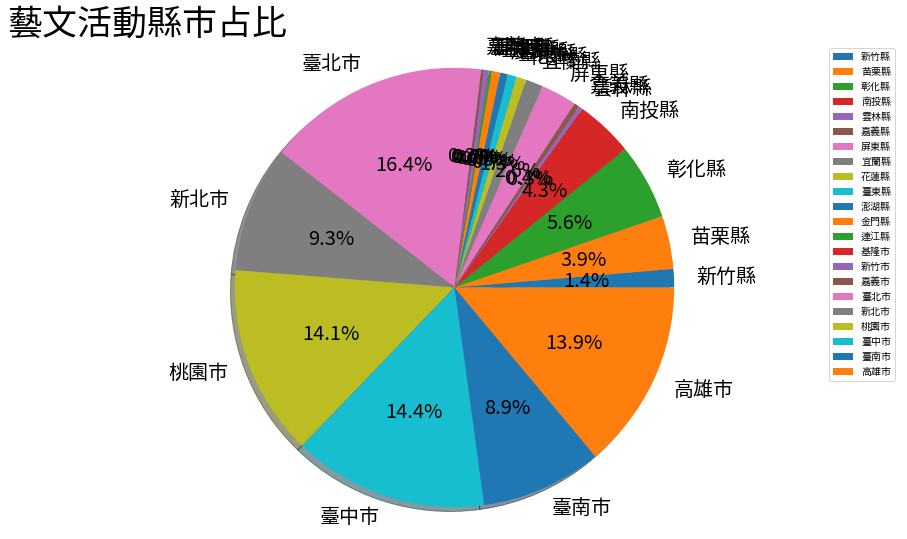

In [3]:
get_all_category_location_analysis()

In [4]:
def get_location_category_analysis(category):
    ## location_List 
    location_list =["新竹縣","苗栗縣","彰化縣","南投縣","雲林縣","嘉義縣","屏東縣","宜蘭縣","花蓮縣","臺東縣","澎湖縣","金門縣","連江縣","基隆市","新竹市","嘉義市","臺北市","新北市","桃園市","臺中市","臺南市","高雄市","台北市","台中市","台東縣","台南市"]

    location_count_list = []
    # Connect to the database
    connection = pymysql.connect(host='localhost',
                                 user='testadmin',
                                 password='testadmin',
                                 database='test',
                                 cursorclass=pymysql.cursors.DictCursor)

    with connection:


        with connection.cursor() as cursor:

            for location in location_list :
                sql = "SELECT   count(DISTINCT uid) as amount  FROM `event_info` WHERE location like %s and category_name =%s"
                cursor.execute(sql, ("%" + location + "%",category))
                result = cursor.fetchone()
                count = result['amount']
                new_list = []
                new_list.append(location)
                new_list.append(count)
                location_count_list.append(new_list)  
    ## count total
    total = 0
    for list_index in location_count_list:
        for i in list_index:
            if(type(i)==int):
                total = total + i
    print(total)
    

    
    ## 今年度 藝文活動場次 比率
    df = pd.DataFrame(location_count_list, columns = ['location', 'count'])
    
    
    ## 簡繁體 轉換
    df=df.set_index('location')
    name_change_list = ["台北市","台中市","台東縣","台南市"]
    for  orign_name in name_change_list :
        transform_name = orign_name.replace("台", "臺")
        df.loc[transform_name]['count'] = df.loc[transform_name]['count'] + df.loc[orign_name]['count']
        df=df.drop(index=orign_name) 
    df['ratio'] = df['count'] / total
    display(df.sort_values(by=['ratio'], ascending=False))

    
    ## 比率圖
    df=df[df['count']>0]
    plt.figure(figsize=(16,9))    # 顯示圖框架大小

    labels = df.index     # 製作圓餅圖的類別標籤
    size = df["ratio"]                         # 製作圓餅圖的數值來源
    plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

    plt.pie(size,                           # 數值
            labels = labels,                # 標籤
            autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
            pctdistance = 0.6,              # 數字距圓心的距離
            textprops = {"fontsize" : 20},  # 文字大小
            shadow=True)                    # 設定陰影


    plt.axis('equal')                                          # 使圓餅圖比例相等
    plt.title("藝文活動縣市占比"+"("+category+")", {"fontsize" : 35},loc ='left')  # 設定標題及其文字大小
    plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

    plt.savefig("藝文活動縣市占比"+"("+category+").jpg",   # 儲存圖檔
                bbox_inches='tight',               # 去除座標軸占用的空間
                pad_inches=0.0)                    # 去除所有白邊
    # plt.close()   

197


,count,ratio
location,,
臺中市,40,0.203046
臺北市,29,0.147208
桃園市,23,0.116751
苗栗縣,21,0.106599
臺南市,19,0.096447
高雄市,18,0.091371
南投縣,10,0.050761
新竹市,8,0.040609
新北市,7,0.035533


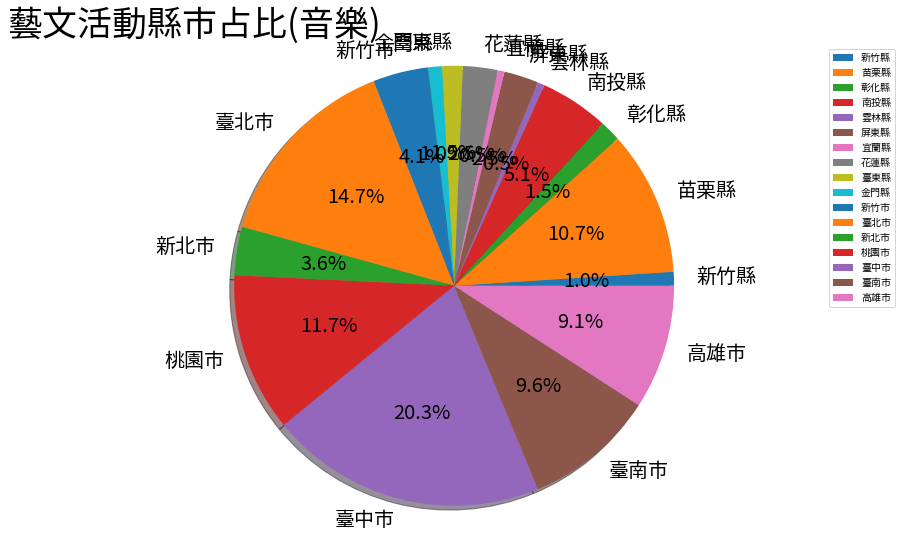

In [5]:
get_location_category_analysis("音樂")

32


,count,ratio
location,,
臺北市,20,0.62500
高雄市,6,0.18750
新北市,3,0.09375
臺中市,2,0.06250
宜蘭縣,1,0.03125
連江縣,0,0.00000
臺南市,0,0.00000
桃園市,0,0.00000
嘉義市,0,0.00000


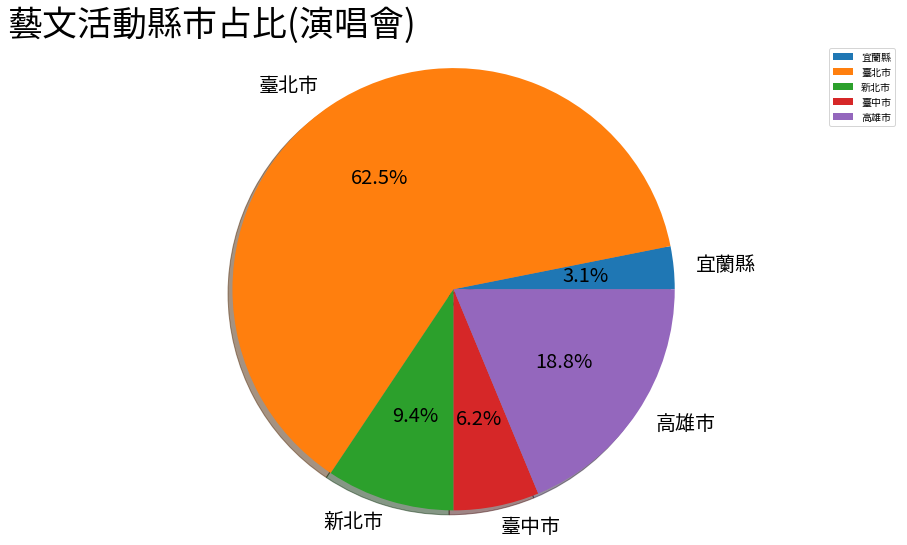

In [6]:
get_location_category_analysis("演唱會")